## Random Forest: Divide dataset into batches of random datasets, then build a decision-tree for each of them. Input your predictive features into each decision-tree, and take a majority vote to decide the prediction.

In [1]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

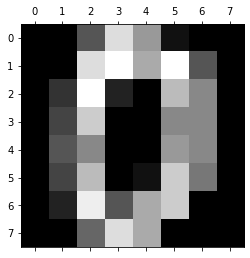

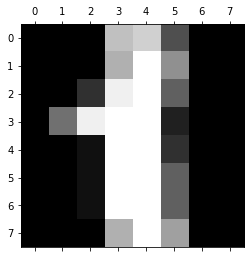

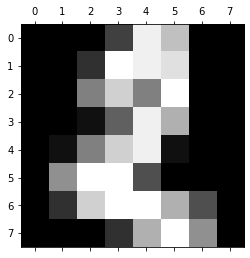

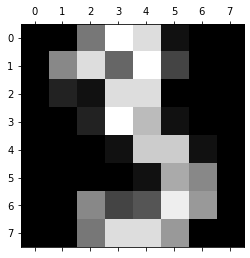

In [5]:
plt.gray() 
for i in range(4):
    plt.matshow(digits.images[i]) 

## Convert data to dataframe. Digits photo data is stored as an array of 64 numbers (for each pixel).

In [20]:
df = pd.DataFrame(digits.data)
df["target"] = digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


## Training, testing data split.

In [11]:
x = df.drop("target",axis='columns')
y = df.target

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

## Apply Random Forest modeling.

In [13]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=20)
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=20)

## Checking accuracy of the model. Accuracy increases with greater 'n_estimators' (diminishing returns).

In [14]:
model.score(x_test, y_test)

0.975

In [15]:
y_predicted = model.predict(x_test)
y_predicted

array([4, 1, 7, 2, 4, 4, 4, 1, 7, 4, 2, 3, 8, 6, 0, 7, 9, 8, 3, 5, 4, 8,
       6, 5, 2, 2, 3, 1, 3, 4, 5, 1, 8, 6, 5, 5, 7, 5, 4, 8, 8, 2, 9, 3,
       8, 9, 7, 1, 0, 1, 5, 0, 7, 5, 1, 2, 3, 9, 5, 7, 2, 3, 8, 4, 5, 3,
       1, 0, 8, 0, 7, 9, 0, 1, 5, 2, 2, 3, 9, 7, 4, 8, 3, 8, 8, 8, 3, 1,
       6, 0, 0, 8, 8, 2, 7, 8, 8, 1, 3, 6, 5, 7, 1, 4, 7, 4, 7, 1, 7, 2,
       2, 7, 5, 6, 3, 1, 0, 4, 2, 8, 2, 1, 2, 6, 9, 5, 7, 0, 7, 7, 6, 8,
       9, 4, 2, 3, 8, 2, 5, 7, 4, 1, 5, 2, 0, 4, 8, 5, 0, 4, 7, 5, 1, 9,
       2, 6, 3, 4, 2, 9, 6, 9, 2, 7, 2, 9, 8, 7, 9, 4, 5, 0, 9, 3, 0, 5,
       3, 1, 1, 9, 1, 1, 0, 6, 8, 9, 9, 5, 3, 7, 9, 8, 9, 4, 0, 0, 6, 1,
       0, 3, 8, 5, 1, 5, 0, 1, 2, 3, 3, 8, 1, 4, 2, 1, 8, 5, 4, 6, 8, 2,
       7, 8, 6, 5, 2, 7, 4, 6, 2, 6, 6, 0, 4, 0, 7, 7, 2, 7, 0, 5, 0, 3,
       5, 9, 7, 0, 4, 0, 0, 0, 8, 2, 2, 6, 2, 6, 1, 8, 3, 3, 3, 4, 4, 6,
       8, 6, 2, 4, 4, 0, 7, 1, 4, 1, 6, 7, 3, 7, 2, 6, 6, 3, 1, 8, 0, 4,
       7, 8, 9, 8, 3, 4, 0, 8, 9, 1, 3, 4, 1, 7, 0,

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[35,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 41,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0, 35,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0, 34,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 39,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 30,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  1,  0, 35,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 37,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 37,  0],
       [ 0,  0,  0,  0,  0,  2,  0,  1,  0, 28]], dtype=int64)

Text(69.0, 0.5, 'Truth')

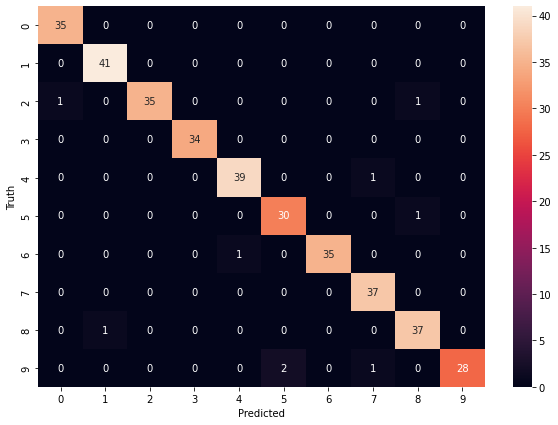

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')